In [1]:
from graphix import Circuit
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

n = 4
xi = np.random.rand(6)
theta = np.random.rand(4)
g = nx.complete_graph(n)
circuit = Circuit(n)
for i, (u, v) in enumerate(g.edges):
    circuit.cnot(u, v)
    circuit.rz(v, xi[i])
    circuit.cnot(u, v)
for v in g.nodes:
    circuit.rx(v, theta[v])

In [2]:
pattern = circuit.transpile()
pattern.standardize()
pattern.shift_signals()
nodes, edges = pattern.get_graph()
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

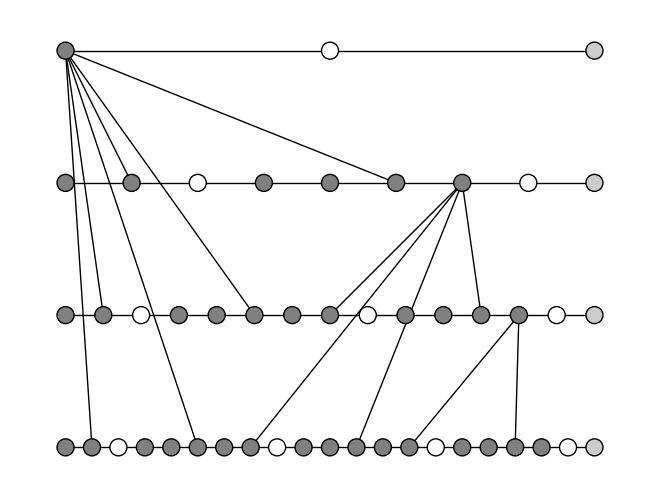

In [3]:
from graphix.gflow import flow

f, l_k = flow(g, {0, 1, 2, 3}, set(pattern.output_nodes))

flow = [[i] for i in range(4)]
for i in range(4):
    contd = True
    val = i
    while contd:
        try:
            val = f[val]
            flow[i].append(val)
        except KeyError:
            contd = False
longest = np.max([len(flow[i]) for i in range(4)])

pos = dict()
for i in range(4):
    length = len(flow[i])
    fac = longest / (length - 1)
    for j in range(len(flow[i])):
        pos[flow[i][j]] = (fac * j, -i)

# determine wheher or not a node will be measured in Pauli basis
def get_clr_list(pattern):
    nodes, edges = pattern.get_graph()
    meas_list = pattern.get_measurement_commands()
    g = nx.Graph()
    g.add_nodes_from(nodes)
    g.add_edges_from(edges)
    clr_list = []
    for i in g.nodes:
        for cmd in meas_list:
            if cmd[1] == i:
                if cmd[3] in [-1, -0.5, 0, 0.5, 1]:
                    clr_list.append([0.5, 0.5, 0.5])
                else:
                    clr_list.append([1, 1, 1])
        if i in pattern.output_nodes:
            clr_list.append([0.8, 0.8, 0.8])
    return clr_list


graph_params = {"with_labels": False, "node_size": 150, "node_color": get_clr_list(pattern), "edgecolors": "k"}
nx.draw(g, pos=pos, **graph_params)

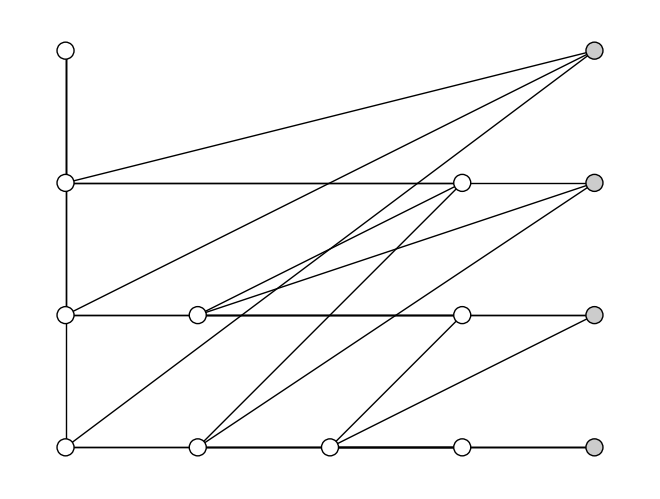

In [4]:
pattern.perform_pauli_measurements()
nodes, edges = pattern.get_graph()
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
graph_params = {"with_labels": False, "node_size": 150, "node_color": get_clr_list(pattern), "edgecolors": "k"}
pos = { # hand-typed for better look
    40: (0, 0),
    5: (0, -1),
    11: (0, -2),
    17: (0, -3),
    23: (1, -2),
    29: (1, -3),
    35: (2, -3),
    42: (3, -1),
    44: (3, -2),
    46: (3, -3),
    41: (4, 0),
    43: (4, -1),
    45: (4, -2),
    47: (4, -3),
}
nx.draw(g, pos=pos, **graph_params)

In [5]:
out_state = pattern.simulate_pattern()
state = circuit.simulate_statevector()
print("overlap of states: ", np.abs(np.dot(state.psi.flatten().conjugate(), out_state.psi.flatten())))
# sphinx_gallery_thumbnail_number = 2


overlap of states:  1.0000000000000002
